In [119]:
import pandas as pd
import re
import numpy as np
!pip install matplotlib
import matplotlib as plt
from matplotlib.backends.backend_pdf import PdfPages

In [82]:
dffull = pd.read_csv('../../../Ironhack-Module-1-Project-Mecaho/data/raw/dffull.csv', thousands=",")
dffull.head()

,id,name,position,Unnamed: 0,id.1,lastName,age,Unnamed: 0.1,gender,country,...,Source_x,worth,worthChange,realTimeWorth,realTimePosition,rank_pop,population,weight_wpopulation,date,Source_y
0,5948,jeff BEzos,1.0,52,5948,beZOS,54 years old,52,None,World,...,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,NaN,1,–,7758960000,100%,4 Jan 2020,UN projection[200]
1,7342,BILL GAtes,2.0,53,7342,GATEs,62 years old,53,M,World,...,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,NaN,2,–,7758960000,100%,4 Jan 2020,UN projection[200]
2,5447,warren BUFFETT,3.0,54,5447,bufFETT,87 years old,54,None,United States,...,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,NaN,3,3,330529481,4.26%,4 Jan 2020,National population clock
3,4420,bernARD ARNAULt,4.0,55,4420,aRNAULT,69 years old,55,M,France,...,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,NaN,4,20,67081000,0.865%,1 Nov 2019,Monthly National estimate[20]
4,4071,mark ZUCKerberg,5.0,56,4071,zuckERBERg,1985,56,M,World,...,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,NaN,5,–,7758960000,100%,4 Jan 2020,UN projection[200]


# Start cleaning

In [83]:
def del_null(df):

    null_cols = df.isnull().sum()/len(df)*100
    null_cols[null_cols>0]
    threshold = 40
    null_filter = null_cols > threshold
    drop_cols = list(null_cols[null_filter].index)
    df.drop(drop_cols, axis=1, inplace=True)

#Apply to:
del_null(dffull)
dffull.head()

,id,name,position,Unnamed: 0,id.1,lastName,age,Unnamed: 0.1,gender,country,...,Unnamed: 0.2,Source_x,worth,worthChange,realTimePosition,rank_pop,population,weight_wpopulation,date,Source_y
0,5948,jeff BEzos,1.0,52,5948,beZOS,54 years old,52,None,World,...,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,1,–,7758960000,100%,4 Jan 2020,UN projection[200]
1,7342,BILL GAtes,2.0,53,7342,GATEs,62 years old,53,M,World,...,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,2,–,7758960000,100%,4 Jan 2020,UN projection[200]
2,5447,warren BUFFETT,3.0,54,5447,bufFETT,87 years old,54,None,United States,...,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3,3,330529481,4.26%,4 Jan 2020,National population clock
3,4420,bernARD ARNAULt,4.0,55,4420,aRNAULT,69 years old,55,M,France,...,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,4,20,67081000,0.865%,1 Nov 2019,Monthly National estimate[20]
4,4071,mark ZUCKerberg,5.0,56,4071,zuckERBERg,1985,56,M,World,...,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,5,–,7758960000,100%,4 Jan 2020,UN projection[200]


In [84]:
def replace(df, col, old_v, new_v):
    df[col] = df[col].replace(old_v, new_v)
    return df

#Apply to:
#replace(dffull, 'age', 'nan', 9999)
replace(dffull, 'gender', 'M', 'Male')
replace(dffull, 'gender', 'F', 'Female')
dffull.head()

,id,name,position,Unnamed: 0,id.1,lastName,age,Unnamed: 0.1,gender,country,...,Unnamed: 0.2,Source_x,worth,worthChange,realTimePosition,rank_pop,population,weight_wpopulation,date,Source_y
0,5948,jeff BEzos,1.0,52,5948,beZOS,54 years old,52,None,World,...,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,1,–,7758960000,100%,4 Jan 2020,UN projection[200]
1,7342,BILL GAtes,2.0,53,7342,GATEs,62 years old,53,Male,World,...,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,2,–,7758960000,100%,4 Jan 2020,UN projection[200]
2,5447,warren BUFFETT,3.0,54,5447,bufFETT,87 years old,54,None,United States,...,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3,3,330529481,4.26%,4 Jan 2020,National population clock
3,4420,bernARD ARNAULt,4.0,55,4420,aRNAULT,69 years old,55,Male,France,...,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,4,20,67081000,0.865%,1 Nov 2019,Monthly National estimate[20]
4,4071,mark ZUCKerberg,5.0,56,4071,zuckERBERg,1985,56,Male,World,...,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,5,–,7758960000,100%,4 Jan 2020,UN projection[200]


In [85]:
def dupli_c (df):
    df = df.loc[:,~df.columns.duplicated()]    
    return df 

dupli_c(dffull)
dffull.head()

,id,name,position,Unnamed: 0,id.1,lastName,age,Unnamed: 0.1,gender,country,...,Unnamed: 0.2,Source_x,worth,worthChange,realTimePosition,rank_pop,population,weight_wpopulation,date,Source_y
0,5948,jeff BEzos,1.0,52,5948,beZOS,54 years old,52,None,World,...,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,1,–,7758960000,100%,4 Jan 2020,UN projection[200]
1,7342,BILL GAtes,2.0,53,7342,GATEs,62 years old,53,Male,World,...,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,2,–,7758960000,100%,4 Jan 2020,UN projection[200]
2,5447,warren BUFFETT,3.0,54,5447,bufFETT,87 years old,54,None,United States,...,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3,3,330529481,4.26%,4 Jan 2020,National population clock
3,4420,bernARD ARNAULt,4.0,55,4420,aRNAULT,69 years old,55,Male,France,...,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,4,20,67081000,0.865%,1 Nov 2019,Monthly National estimate[20]
4,4071,mark ZUCKerberg,5.0,56,4071,zuckERBERg,1985,56,Male,World,...,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,5,–,7758960000,100%,4 Jan 2020,UN projection[200]


In [86]:
def drop_c(df, x):
        df.drop([x], axis=1, inplace=True)
        return df
    
#Apply to:
drop_c(dffull, 'Unnamed: 0')
drop_c(dffull, 'Unnamed: 0.1')
drop_c(dffull, 'Unnamed: 0.2')
drop_c(dffull, 'id')
drop_c(dffull, 'id.1')
drop_c(dffull, 'id.2')
drop_c(dffull, 'realTimePosition')
drop_c(dffull, 'Source_y')
dffull.head()

,name,position,lastName,age,gender,country,image,Source_x,worth,worthChange,rank_pop,population,weight_wpopulation,date
0,jeff BEzos,1.0,beZOS,54 years old,None,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,–,7758960000,100%,4 Jan 2020
1,BILL GAtes,2.0,GATEs,62 years old,Male,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,–,7758960000,100%,4 Jan 2020
2,warren BUFFETT,3.0,bufFETT,87 years old,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3,330529481,4.26%,4 Jan 2020
3,bernARD ARNAULt,4.0,aRNAULT,69 years old,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,20,67081000,0.865%,1 Nov 2019
4,mark ZUCKerberg,5.0,zuckERBERg,1985,Male,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,–,7758960000,100%,4 Jan 2020


In [87]:
def rename_c(df, old, new):
    df.rename(columns={old: new}, inplace=True)
    return df
rename_c(dffull, 'lastName', 'last_name')
rename_c(dffull, 'Source_x', 'source')
rename_c(dffull, 'worthChange', 'worth_change')
dffull.head()

,name,position,last_name,age,gender,country,image,source,worth,worth_change,rank_pop,population,weight_wpopulation,date
0,jeff BEzos,1.0,beZOS,54 years old,None,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,–,7758960000,100%,4 Jan 2020
1,BILL GAtes,2.0,GATEs,62 years old,Male,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,–,7758960000,100%,4 Jan 2020
2,warren BUFFETT,3.0,bufFETT,87 years old,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3,330529481,4.26%,4 Jan 2020
3,bernARD ARNAULt,4.0,aRNAULT,69 years old,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,20,67081000,0.865%,1 Nov 2019
4,mark ZUCKerberg,5.0,zuckERBERg,1985,Male,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,–,7758960000,100%,4 Jan 2020


In [88]:
def title(df, x):
    df[x] = df[x].str.title()
    return df

title(dffull,'name')
title(dffull,'last_name')
dffull.head()

,name,position,last_name,age,gender,country,image,source,worth,worth_change,rank_pop,population,weight_wpopulation,date
0,Jeff Bezos,1.0,Bezos,54 years old,None,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,–,7758960000,100%,4 Jan 2020
1,Bill Gates,2.0,Gates,62 years old,Male,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,–,7758960000,100%,4 Jan 2020
2,Warren Buffett,3.0,Buffett,87 years old,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3,330529481,4.26%,4 Jan 2020
3,Bernard Arnault,4.0,Arnault,69 years old,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,20,67081000,0.865%,1 Nov 2019
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,World,https://specials-images.forbesimg.com/imageser...,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,–,7758960000,100%,4 Jan 2020


In [93]:
def del_str_patt(df, col, del_str, new_str):
    df[col] = df[col].apply(lambda x: re.sub(del_str, new_str, str(x)))
    return df
del_str_patt(dffull, 'country', '\([^()]*\)', '')
del_str_patt(dffull, 'worth', ' BUSD', '')
del_str_patt(dffull, 'worth_change', ' millions USD', '')
dffull.head()

,name,position,last_name,age,gender,country,image,source,worth,worth_change,rank_pop,population,weight_wpopulation,date,company,mod_age
0,Jeff Bezos,1.0,Bezos,54,None,World,https://specials-images.forbesimg.com/imageser...,Technology,112.0,0.0,–,7758960000,100%,4 Jan 2020,Amazon,54.0
1,Bill Gates,2.0,Gates,62,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,90.0,-0.001,–,7758960000,100%,4 Jan 2020,Microsoft,62.0
2,Warren Buffett,3.0,Buffett,87,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments,84.0,-0.002,3,330529481,4.26%,4 Jan 2020,Berkshire Hathaway,87.0
3,Bernard Arnault,4.0,Arnault,69,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,72.0,0.0,20,67081000,0.865%,1 Nov 2019,LVMH,69.0
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,71.0,0.0,–,7758960000,100%,4 Jan 2020,Facebook,33.0


In [90]:
def split(df, new_c2, old_c1, x):
    df[new_c2] = df[old_c1].str.split(x).str[1]
    df[old_c1] = df[old_c1].str.split(x).str[0]
    return df

#Apply to:
split(dffull, 'company', 'source', '==>')
dffull.head()

,name,position,last_name,age,gender,country,image,source,worth,worth_change,rank_pop,population,weight_wpopulation,date,company
0,Jeff Bezos,1.0,Bezos,54 years old,None,World,https://specials-images.forbesimg.com/imageser...,Technology,112.0,0.0,–,7758960000,100%,4 Jan 2020,Amazon
1,Bill Gates,2.0,Gates,62 years old,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,90.0,-0.001,–,7758960000,100%,4 Jan 2020,Microsoft
2,Warren Buffett,3.0,Buffett,87 years old,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments,84.0,-0.002,3,330529481,4.26%,4 Jan 2020,Berkshire Hathaway
3,Bernard Arnault,4.0,Arnault,69 years old,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,72.0,0.0,20,67081000,0.865%,1 Nov 2019,LVMH
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,71.0,0.0,–,7758960000,100%,4 Jan 2020,Facebook


In [95]:
def mod_age(df):
    del_str_patt(dffull, 'age', '\s[^\d]+', '')
    del_str_patt(dffull, 'age', 'nan', '9999')
    dffull['age'] = dffull['age'].astype(int)
    dffull['mod_age'] = dffull['age'].apply(lambda x: 2018-x if x > 1000 and x < 8888 else x)
    dffull['mod_age'].replace(9999, np.NaN, inplace=True)
    return df
mod_age(dffull)

,name,position,last_name,age,gender,country,image,source,worth,worth_change,rank_pop,population,weight_wpopulation,date,company,mod_age
0,Jeff Bezos,1.0,Bezos,54,None,World,https://specials-images.forbesimg.com/imageser...,Technology,112.0,0.0,–,7758960000,100%,4 Jan 2020,Amazon,54.0
1,Bill Gates,2.0,Gates,62,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,90.0,-0.001,–,7758960000,100%,4 Jan 2020,Microsoft,62.0
2,Warren Buffett,3.0,Buffett,87,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments,84.0,-0.002,3,330529481,4.26%,4 Jan 2020,Berkshire Hathaway,87.0
3,Bernard Arnault,4.0,Arnault,69,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,72.0,0.0,20,67081000,0.865%,1 Nov 2019,LVMH,69.0
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,71.0,0.0,–,7758960000,100%,4 Jan 2020,Facebook,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,Zhao Xiaoqiang,2204.0,Zhao,51,Male,China,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,1.0,0.0,1,1400737880,18.1%,4 Jan 2020,"fashion, entertainment",51.0
2204,Zhou Liangzhang,2205.0,Zhou,55,Male,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,nan,–,7758960000,100%,4 Jan 2020,electrical equipment,55.0
2205,Zhu Xingming,2206.0,Zhu,51,None,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,0.0,–,7758960000,100%,4 Jan 2020,electrical equipment,51.0
2206,Zhuo Jun,2207.0,Zhuo,52,Female,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,0.0,–,7758960000,100%,4 Jan 2020,printed circuit boards,52.0


In [96]:
def cast (df, col, type):
    df[col] = df[col].astype(type)
    return df
cast(dffull, 'worth', float)
cast(dffull, 'population', int)

,name,position,last_name,age,gender,country,image,source,worth,worth_change,rank_pop,population,weight_wpopulation,date,company,mod_age
0,Jeff Bezos,1.0,Bezos,54,None,World,https://specials-images.forbesimg.com/imageser...,Technology,112.0,0.0,–,7758960000,100%,4 Jan 2020,Amazon,54.0
1,Bill Gates,2.0,Gates,62,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,90.0,-0.001,–,7758960000,100%,4 Jan 2020,Microsoft,62.0
2,Warren Buffett,3.0,Buffett,87,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments,84.0,-0.002,3,330529481,4.26%,4 Jan 2020,Berkshire Hathaway,87.0
3,Bernard Arnault,4.0,Arnault,69,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,72.0,0.0,20,67081000,0.865%,1 Nov 2019,LVMH,69.0
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,71.0,0.0,–,7758960000,100%,4 Jan 2020,Facebook,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,Zhao Xiaoqiang,2204.0,Zhao,51,Male,China,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,1.0,0.0,1,1400737880,18.1%,4 Jan 2020,"fashion, entertainment",51.0
2204,Zhou Liangzhang,2205.0,Zhou,55,Male,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,nan,–,7758960000,100%,4 Jan 2020,electrical equipment,55.0
2205,Zhu Xingming,2206.0,Zhu,51,None,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,0.0,–,7758960000,100%,4 Jan 2020,electrical equipment,51.0
2206,Zhuo Jun,2207.0,Zhuo,52,Female,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,0.0,–,7758960000,100%,4 Jan 2020,printed circuit boards,52.0


In [97]:
def dupli (df):
    before = len(df)
    #cols = ['name', 'last_name']
    df = df.drop_duplicates()
    after = len(df)
    return print(f'Number of duplicate records dropped: {before - after}')

dupli(dffull)

Number of duplicate records dropped: 0


In [101]:
dffull['money_pp'] = (dffull['worth'] * 1000000000) / dffull['population']
dffull.sort_values('position')

,name,position,last_name,age,gender,country,image,source,worth,worth_change,rank_pop,population,weight_wpopulation,date,company,mod_age,money_pp
0,Jeff Bezos,1.0,Bezos,54,None,World,https://specials-images.forbesimg.com/imageser...,Technology,112.0,0.0,–,7758960000,100%,4 Jan 2020,Amazon,54.0,14.434924
1,Bill Gates,2.0,Gates,62,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,90.0,-0.001,–,7758960000,100%,4 Jan 2020,Microsoft,62.0,11.599493
2,Warren Buffett,3.0,Buffett,87,None,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments,84.0,-0.002,3,330529481,4.26%,4 Jan 2020,Berkshire Hathaway,87.0,254.137694
3,Bernard Arnault,4.0,Arnault,69,Male,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,72.0,0.0,20,67081000,0.865%,1 Nov 2019,LVMH,69.0,1073.329259
4,Mark Zuckerberg,5.0,Zuckerberg,1985,Male,World,https://specials-images.forbesimg.com/imageser...,Technology,71.0,0.0,–,7758960000,100%,4 Jan 2020,Facebook,33.0,9.150711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,Zhao Xiaoqiang,2204.0,Zhao,51,Male,China,https://specials-images.forbesimg.com/imageser...,Fashion & Retail,1.0,0.0,1,1400737880,18.1%,4 Jan 2020,"fashion, entertainment",51.0,0.713909
2204,Zhou Liangzhang,2205.0,Zhou,55,Male,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,nan,–,7758960000,100%,4 Jan 2020,electrical equipment,55.0,0.128883
2205,Zhu Xingming,2206.0,Zhu,51,None,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,0.0,–,7758960000,100%,4 Jan 2020,electrical equipment,51.0,0.128883
2206,Zhuo Jun,2207.0,Zhuo,52,Female,World,https://specials-images.forbesimg.com/imageser...,Manufacturing,1.0,0.0,–,7758960000,100%,4 Jan 2020,printed circuit boards,52.0,0.128883


,sum
country,
Angola,86.16
Argentina,100.14
Australia,1665.77
Austria,528.18
Brazil,73.96
Canada,1264.69
Chile,648.97
China,338.75
Colombia,327.40


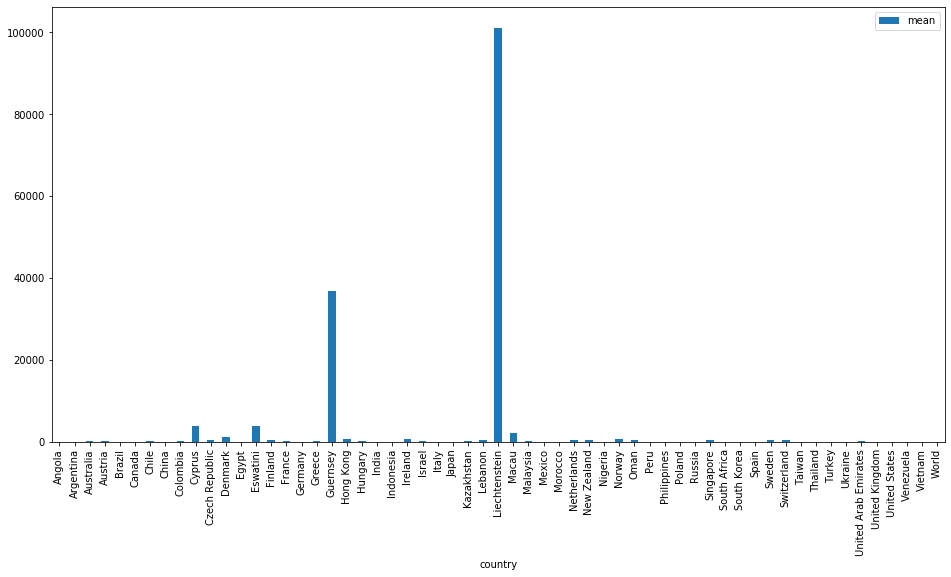

In [104]:

dffull.groupby('country')['money_pp'].agg(['sum']).round(2)

In [103]:
dffull.to_csv('../../../Ironhack-Module-1-Project-Mecaho/data/processed/dffull.csv',sep=',', index = False)

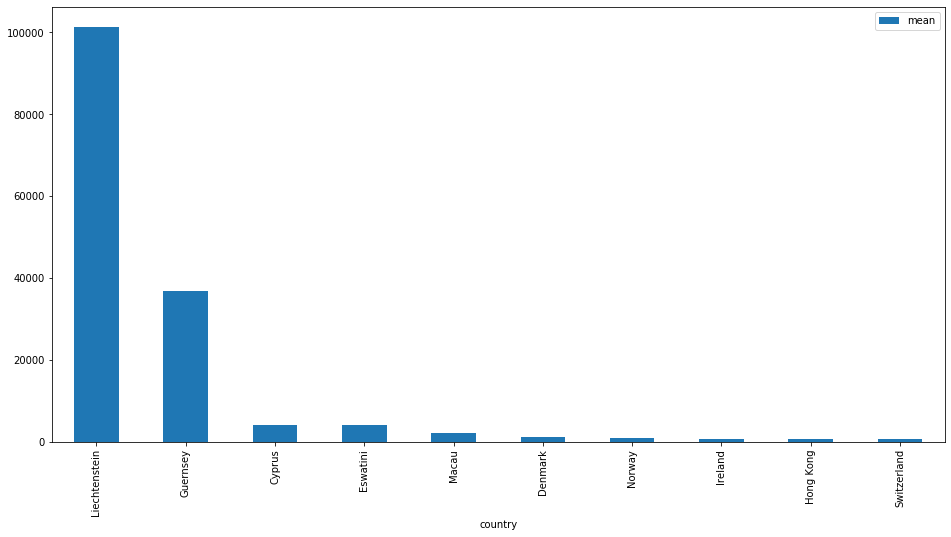

In [112]:
dffull.groupby('country')['money_pp'].agg(['mean']).round(2).sort_values(by='mean', ascending = False).nlargest(10, 'mean').plot(kind='bar', figsize = (16,8))

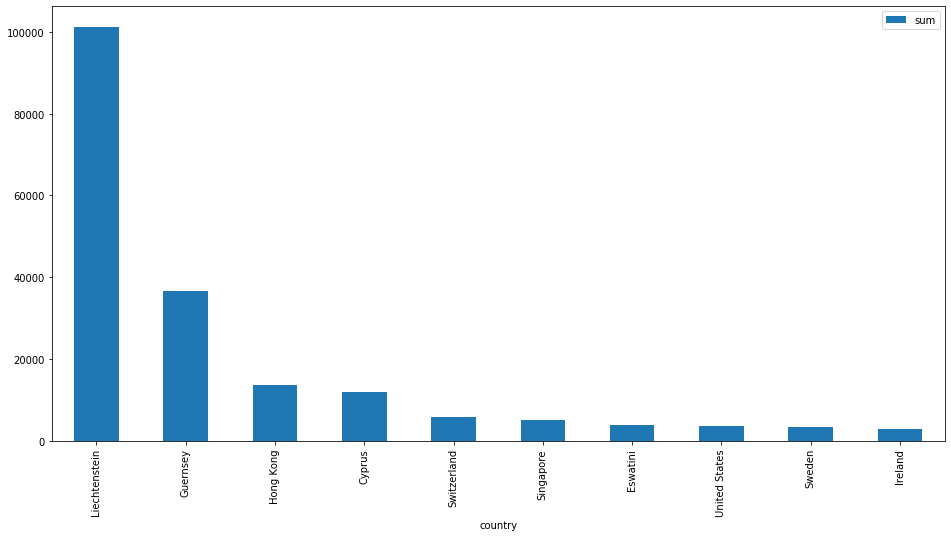

In [113]:
dffull.groupby('country')['money_pp'].agg(['sum']).round(2).sort_values(by='sum', ascending = False).nlargest(10, 'sum').plot(kind='bar', figsize = (16,8))

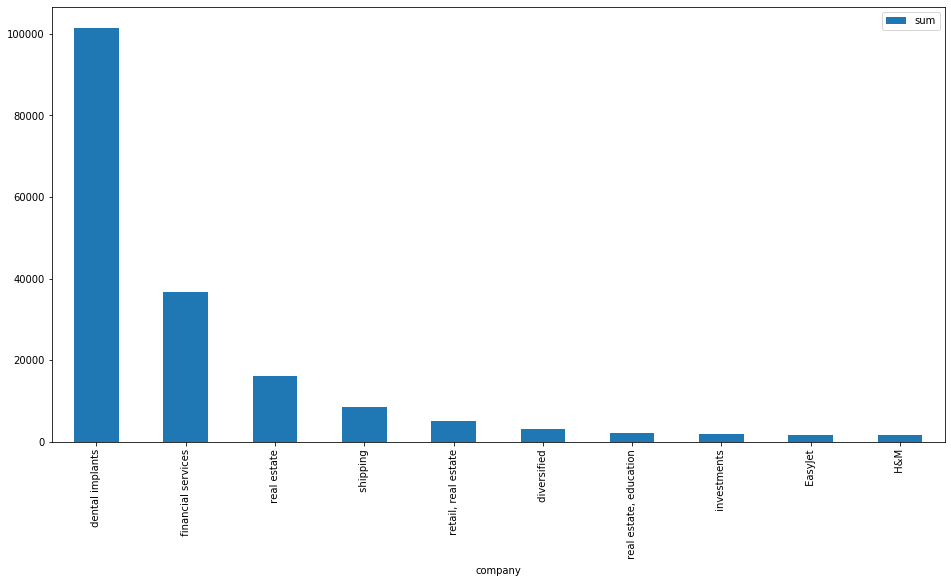

In [114]:
dffull.groupby('company')['money_pp'].agg(['sum']).round(2).sort_values(by='sum', ascending = False).nlargest(10, 'sum').plot(kind='bar', figsize = (16,8))

In [118]:
pp = PdfPages('multipage.pdf')
plt.savefig(pp, format='pdf')
pp.savefig()
pp.close()

AttributeError: module 'matplotlib' has no attribute 'savefig'